In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Handle table-like data and matrices
import numpy as np
import pandas as pd
import math 
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
import keras

from sklearn.metrics import roc_curve, auc

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualisations
%matplotlib inline
sns.set_style( 'white' )

from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


ModuleNotFoundError: No module named 'imblearn'

In [6]:
df = pd.read_csv(r'C:\Users\USER\Downloads\Researchs on Mortality Prediction in ICU\Mortality Prediction in ICU\train.csv', encoding = 'utf-8')

In [3]:
labels = pd.read_csv(r'C:\Users\USER\Downloads\Researchs on Mortality Prediction in ICU\Mortality Prediction in ICU\\labels.csv', encoding = 'utf-8')

In [7]:
df.head()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
0,77.0,31.0,46.0,54,2.973333,10.500000,0.7,154.0,0.750000,58.795833,...,17.428571,97.250000,116.891892,37.357143,2.1,0.14,171.052632,10.300000,80.060976,7.387273
1,77.0,31.0,46.0,76,2.973333,18.333333,0.7,154.0,1.100000,58.897059,...,19.000000,96.833333,113.411765,36.939130,2.1,0.14,151.560976,11.266667,80.670588,7.395000
2,116.0,83.0,199.5,44,2.500000,4.666667,2.9,154.0,0.333333,67.125000,...,19.000000,95.000000,125.687500,37.800000,2.1,0.14,124.951220,4.700000,56.700000,7.495000
3,105.0,12.0,15.0,68,4.400000,17.666667,0.2,154.0,0.766667,58.795833,...,15.457627,97.250000,116.891892,36.223077,2.1,0.14,545.833333,9.400000,84.600000,7.387273
4,77.0,31.0,46.0,88,3.300000,35.000000,0.7,154.0,1.000000,58.795833,...,19.166667,97.250000,116.891892,36.880000,2.1,0.14,62.131579,4.300000,80.060976,7.387273


In [8]:
df.columns

Index(['ALP', 'ALT', 'AST', 'Age', 'Albumin', 'BUN', 'Bilirubin',
       'Cholesterol', 'Creatinine', 'DiasABP', 'FiO2', 'GCS', 'Gender',
       'Glucose', 'HCO3', 'HCT', 'HR', 'Height', 'ICUType', 'K', 'Lactate',
       'MAP', 'MechVent', 'Mg', 'NIDiasABP', 'NIMAP', 'NISysABP', 'Na',
       'PaCO2', 'PaO2', 'Platelets', 'RecordID', 'RespRate', 'SaO2', 'SysABP',
       'Temp', 'TroponinI', 'TroponinT', 'Urine', 'WBC', 'Weight', 'pH'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ALP          3999 non-null   float64
 1   ALT          3999 non-null   float64
 2   AST          3999 non-null   float64
 3   Age          3999 non-null   int64  
 4   Albumin      3999 non-null   float64
 5   BUN          3999 non-null   float64
 6   Bilirubin    3999 non-null   float64
 7   Cholesterol  3999 non-null   float64
 8   Creatinine   3999 non-null   float64
 9   DiasABP      3999 non-null   float64
 10  FiO2         3999 non-null   float64
 11  GCS          3999 non-null   float64
 12  Gender       3999 non-null   int64  
 13  Glucose      3999 non-null   float64
 14  HCO3         3999 non-null   float64
 15  HCT          3999 non-null   float64
 16  HR           3999 non-null   float64
 17  Height       3999 non-null   float64
 18  ICUType      3999 non-null   int64  
 19  K     

In [18]:
df.describe()
# summary = df.describe()
# summary.to_csv('summary_statistics.csv')

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,...,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,89.259978,91.709903,130.219258,64.247562,2.975942,25.449665,1.216527,152.403601,1.363130,59.262693,...,19.223967,96.940907,118.145550,36.956291,2.368702,0.337362,133.363074,12.521058,82.799384,7.488870
std,70.397850,427.290858,590.482153,17.563142,0.404440,20.586576,2.961385,13.891279,1.406947,9.080069,...,2.074830,2.296143,16.540816,0.727382,2.418656,1.276145,117.304284,6.466063,23.117431,2.986373
min,12.000000,3.000000,6.000000,15.000000,1.100000,2.250000,0.100000,0.000000,0.200000,0.000000,...,10.543478,38.800000,0.000000,21.644615,0.300000,0.010000,0.000000,0.100000,3.500000,6.311667
25%,77.000000,31.000000,46.000000,52.500000,2.973333,13.000000,0.700000,154.000000,0.700000,55.843712,...,19.000000,97.230769,111.099359,36.614286,2.100000,0.125000,74.044118,8.900000,68.201064,7.364142
50%,77.000000,31.000000,46.000000,67.000000,2.973333,19.000000,0.700000,154.000000,0.933333,58.795833,...,19.000000,97.250000,116.891892,36.968750,2.100000,0.140000,111.032258,11.466667,80.060976,7.387273
75%,82.000000,32.250000,49.000000,78.000000,3.000000,30.000000,0.700000,154.000000,1.366667,62.210006,...,19.290323,97.250000,123.504098,37.364401,2.100000,0.140000,160.419207,14.950000,93.040476,7.407500
max,1472.333333,9143.428571,15680.000000,90.000000,5.300000,170.833333,46.366667,330.000000,16.457143,106.666667,...,39.655172,100.000000,181.725000,39.748980,49.200000,24.040000,3082.380952,137.233333,300.000000,128.532500


In [19]:
df.shape

(3999, 42)

In [20]:
#One Hot encoding
temp  =[]
for i in labels["In-hospital_death"]:
  if i == 0:
    temp.append([1,0])
  else:
    temp.append([0,1])
temp = np.array(temp)

In [21]:
labels["In-hospital_death"].value_counts()

0    3445
1     554
Name: In-hospital_death, dtype: int64

In [10]:
new = pd.concat([df , labels] , axis = 1)
print(new.shape)

(3999, 43)


In [23]:
new.head()



,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH,In-hospital_death
0,77.0,31.0,46.0,54,2.973333,10.500000,0.7,154.0,0.750000,58.795833,...,97.250000,116.891892,37.357143,2.1,0.14,171.052632,10.300000,80.060976,7.387273,0
1,77.0,31.0,46.0,76,2.973333,18.333333,0.7,154.0,1.100000,58.897059,...,96.833333,113.411765,36.939130,2.1,0.14,151.560976,11.266667,80.670588,7.395000,0
2,116.0,83.0,199.5,44,2.500000,4.666667,2.9,154.0,0.333333,67.125000,...,95.000000,125.687500,37.800000,2.1,0.14,124.951220,4.700000,56.700000,7.495000,0
3,105.0,12.0,15.0,68,4.400000,17.666667,0.2,154.0,0.766667,58.795833,...,97.250000,116.891892,36.223077,2.1,0.14,545.833333,9.400000,84.600000,7.387273,0
4,77.0,31.0,46.0,88,3.300000,35.000000,0.7,154.0,1.000000,58.795833,...,97.250000,116.891892,36.880000,2.1,0.14,62.131579,4.300000,80.060976,7.387273,0


In [11]:
X = new.drop('In-hospital_death', axis=1)
y = new['In-hospital_death']


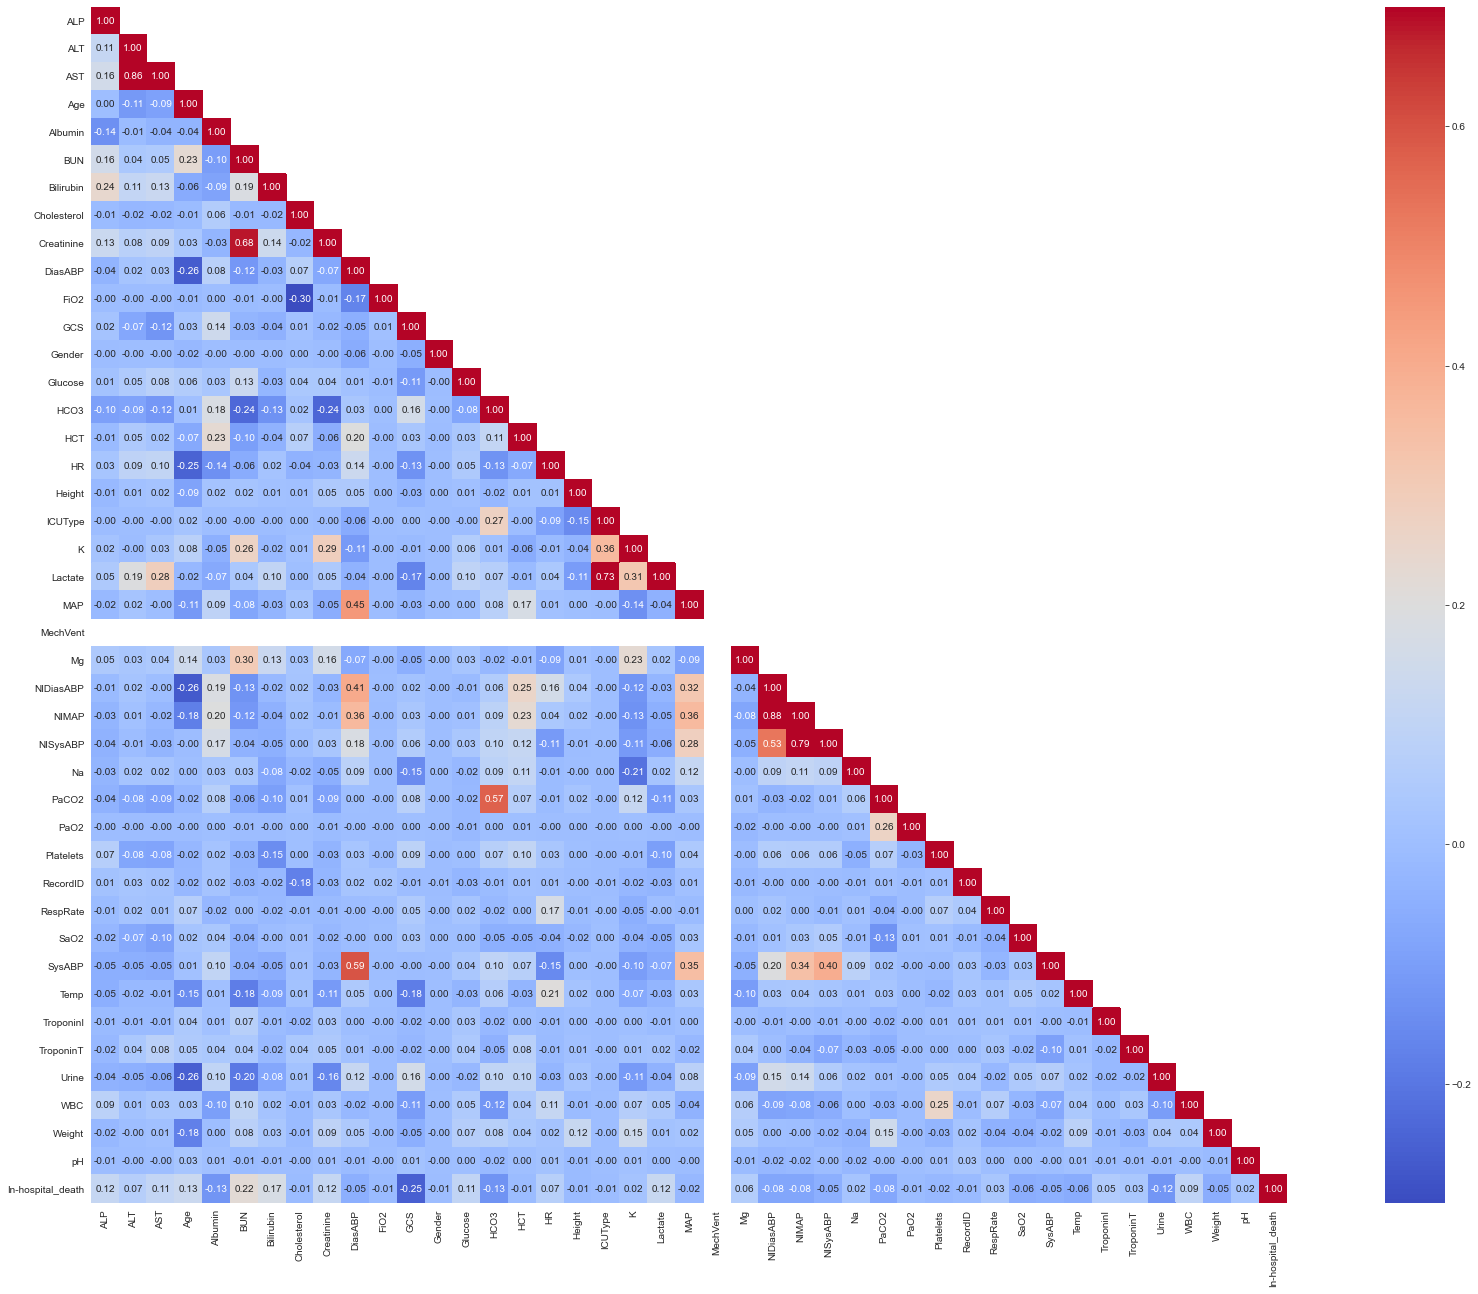

In [38]:
correlation_map = new[new.columns].corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig, ax = plt.subplots(figsize=(35, 22))
sns.heatmap(correlation_map, mask=obj, vmax=.7, square=True, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [12]:
corr_target = abs(correlation_map['In-hospital_death'])

NameError: name 'correlation_map' is not defined

In [36]:
relevante_features = corr_target[corr_target > 0.05]
print(relevante_features)

ALP                  0.115577
ALT                  0.070992
AST                  0.108484
Age                  0.130701
Albumin              0.126925
BUN                  0.223369
Bilirubin            0.174017
Creatinine           0.117615
DiasABP              0.050506
GCS                  0.254104
Glucose              0.105764
HCO3                 0.129574
HR                   0.073561
Lactate              0.124184
Mg                   0.061766
NIDiasABP            0.080454
NIMAP                0.078995
NISysABP             0.052866
PaCO2                0.075550
SaO2                 0.056530
Temp                 0.059519
TroponinI            0.053133
Urine                0.120881
WBC                  0.094936
Weight               0.054443
In-hospital_death    1.000000
Name: In-hospital_death, dtype: float64


In [19]:
df = new.drop(['Gender','Cholesterol','HCT','ICUType','Height'] , axis =1)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Instantiate the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to oversample the minority class
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


In [22]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


LogisticRegression()

Accuracy on Test Data

In [23]:
y_pred = log_reg.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)


In [24]:
print(accuracy)

0.875


The accuracy of our model on Training data is ->

In [25]:
x_train_pred = log_reg.predict(X_train)
accuracy = accuracy_score( y_train, x_train_pred)
accuracy

0.869959362300719

Accuracy of test data

In [26]:
x_test_pred = log_reg.predict(X_test)
accuracy = accuracy_score( y_test, x_test_pred)
accuracy

0.875

In [28]:
probs = log_reg.predict_proba(X_test)[:, 1]

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

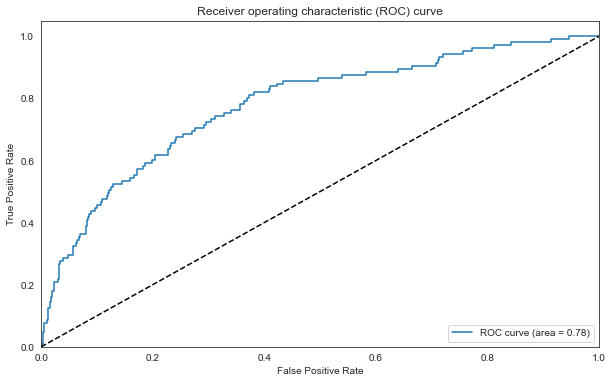

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()